<a href="https://colab.research.google.com/github/pedroafleite/pedroafleite/blob/main/landsat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
sat = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/landsat/sat.trn", sep=' ', header=None)
print(sat.shape)
sat_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/landsat/sat.tst", sep=' ', header=None)
print(sat_test.shape)

(4435, 37)
(2000, 37)


In [3]:
sat.rename(columns={36: 'Class'}, inplace=True)

In [4]:
sat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,Class
0,92,115,120,94,84,102,106,79,84,102,102,83,101,126,133,103,92,112,118,85,84,103,104,81,102,126,134,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,102,79,92,112,118,85,84,103,104,81,84,99,104,78,88,121,128,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,102,79,84,103,104,81,84,99,104,78,84,99,104,81,84,107,113,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,98,76,84,99,104,78,84,99,104,81,76,99,104,81,84,99,104,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,102,79,84,99,104,81,76,99,104,81,76,99,108,85,84,99,104,79,84,103,104,79,79,107,109,87,3


In [5]:
sat['Class'].value_counts()

1    1072
7    1038
3     961
2     479
5     470
4     415
Name: Class, dtype: int64

## Binary Classification

One frame of Landsat MSS imagery consists of four digital images of the same scene in different spectral bands. Two of these are in the visible region (corresponding approximately to green and red regions of the visible spectrum) and two are in the (near) infra-red. Each pixel is a 8-bit binary word, with 0 corresponding to black and 255 to white. The spatial resolution of a pixel is about 80m x 80m. Each image contains 2340 x 3380 such pixels.

The database is a (tiny) sub-area of a scene, consisting of 82 x 100 pixels. Each line of data corresponds to a 3x3 square neighbourhood of pixels completely contained within the 82x100 sub-area. Each line contains the pixel values in the four spectral bands (converted to ASCII) of each of the 9 pixels in the 3x3 neighbourhood and a number indicating the classification label of the central pixel. The number is a code for the following classes:


Remember that Number Class:

1 red soil

2 cotton crop

3 grey soil

4 damp grey soil

5 soil with vegetation stubble

6 mixture class (all types present)

7 very damp grey soil

In [6]:
txt = ['top_left1', 'top_left2', 'top_left3', 'top_left4', 
       'top_center1', 'top_center2', 'top_center3', 'top_center4',
       'top_right1', 'top_right2', 'top_right3', 'top_right4',
       'middle_left1', 'middle_left2', 'middle_left3', 'middle_left4', 
       'middle_center1', 'middle_center2', 'middle_center3', 'middle_center4',
       'middle_right1', 'middle_right2', 'middle_right3', 'middle_right4',
       'bottom_left1', 'bottom_left2', 'bottom_left3', 'bottom_left4', 
       'bottom_center1', 'bottom_center2', 'bottom_center3', 'bottom_center4',
       'bottom_right1', 'bottom_right2', 'bottom_right3', 'bottom_right4', 'Class']
sat = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/landsat/sat.trn", sep=' ', dtype=str, names=txt)
sat

,top_left1,top_left2,top_left3,top_left4,top_center1,top_center2,top_center3,top_center4,top_right1,top_right2,top_right3,top_right4,middle_left1,middle_left2,middle_left3,middle_left4,middle_center1,middle_center2,middle_center3,middle_center4,middle_right1,middle_right2,middle_right3,middle_right4,bottom_left1,bottom_left2,bottom_left3,bottom_left4,bottom_center1,bottom_center2,bottom_center3,bottom_center4,bottom_right1,bottom_right2,bottom_right3,bottom_right4,Class
0,92,115,120,94,84,102,106,79,84,102,102,83,101,126,133,103,92,112,118,85,84,103,104,81,102,126,134,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,102,79,92,112,118,85,84,103,104,81,84,99,104,78,88,121,128,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,102,79,84,103,104,81,84,99,104,78,84,99,104,81,84,107,113,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,98,76,84,99,104,78,84,99,104,81,76,99,104,81,84,99,104,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,102,79,84,99,104,81,76,99,104,81,76,99,108,85,84,99,104,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,108,96,59,75,109,96,67,87,113,96,67,95,109,92,63,79,108,92,66,83,108,96,66,87,104,89,5
4431,64,71,108,96,68,75,108,96,71,87,108,88,67,87,113,96,67,95,109,92,75,99,104,83,66,83,108,96,66,87,104,89,63,87,104,89,5
4432,68,75,108,96,71,87,108,88,71,91,100,81,67,95,109,92,75,99,104,83,75,95,100,79,66,87,104,89,63,87,104,89,70,100,104,85,4
4433,71,87,108,88,71,91,100,81,76,95,108,88,75,99,104,83,75,95,100,79,71,91,100,83,63,87,104,89,70,100,104,85,70,91,104,85,4


In each line of data the four spectral values for the top-left pixel are given first followed by the four spectral values for the top-middle pixel and then those for the top-right pixel, and so on with the pixels read out in sequence left-to-right and top-to-bottom. 

 Thus, the four spectral values for the central pixel are given by attributes 17,18,19 and 20 (which would be 'middle_center1', 'middle_center2', 'middle_center3', 'middle_center4'). If you like you can use only these four attributes, while ignoring the others. This avoids the problem which arises when a 3x3 neighbourhood straddles a boundary.

In [7]:
sat_band1 = sat[['top_left1', 'top_center1', 'top_right1', 
                 'middle_left1', 'middle_center1', 'middle_right1',
                 'bottom_left1', 'bottom_center1', 'bottom_right1']].astype('int')
sat_band2 = sat[['top_left2', 'top_center2', 'top_right2', 
                 'middle_left2', 'middle_center2', 'middle_right2', 
                 'bottom_left2', 'bottom_center2', 'bottom_right2']].astype('int')
sat_band3 = sat[['top_left3', 'top_center3', 'top_right3', 
                 'middle_left3', 'middle_center3', 'middle_right3', 
                 'bottom_left3', 'bottom_center3', 'bottom_right3']].astype('int')
sat_band4 = sat[['top_left4', 'top_center4', 'top_right4', 
                 'middle_left4', 'middle_center4', 'middle_right4', 
                 'bottom_left4', 'bottom_center4', 'bottom_right4']].astype('int')

In [8]:
sat_band1.values

array([[ 92,  84,  84, ..., 102,  88,  84],
       [ 84,  84,  80, ...,  88,  84,  84],
       [ 84,  80,  84, ...,  84,  84,  84],
       ...,
       [ 68,  71,  71, ...,  66,  63,  70],
       [ 71,  71,  76, ...,  63,  70,  70],
       [ 71,  76,  80, ...,  70,  70,  63]])

In [9]:
sat_band1.iloc[3000:3001]

,top_left1,top_center1,top_right1,middle_left1,middle_center1,middle_right1,bottom_left1,bottom_center1,bottom_right1
3000,60,53,64,64,60,71,63,59,71


In [10]:
# soil with vegetation stubble
dfs = sat_band1.iloc[3000:3001].to_numpy()
dfs

array([[60, 53, 64, 64, 60, 71, 63, 59, 71]])

In [11]:
dfs = np.reshape(dfs, (3,3))
dfs

array([[60, 53, 64],
       [64, 60, 71],
       [63, 59, 71]])

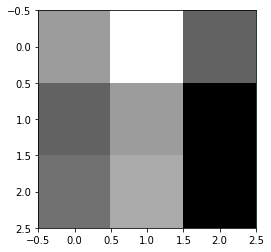

In [12]:
import matplotlib

plt.imshow(dfs, cmap = matplotlib.cm.binary, interpolation='nearest')

However, that is somewhat fruitless, since as said in the documentation: "the data is given in random order and certain lines of data have been removed so you cannot reconstruct the original image from this dataset." Therefore, the machine learning algorithm would have to work without the image, since we cannot arrange the whole image in any consistant way.

# Binary Classification

Let's make a Binary Classification in which we find class of 5 (soil with vegetation stubble) among classes of non-5 (non-soil with vegetation stubble).

First thing, it might be interesting to divide the 4 Bands all through, instead of line by line.

In [13]:
sat_band1.head()

,top_left1,top_center1,top_right1,middle_left1,middle_center1,middle_right1,bottom_left1,bottom_center1,bottom_right1
0,92,84,84,101,92,84,102,88,84
1,84,84,80,92,84,84,88,84,84
2,84,80,84,84,84,84,84,84,84
3,80,84,80,84,84,76,84,84,84
4,84,80,80,84,76,76,84,84,79


In [14]:
sat_band1 = sat_band1.to_numpy()
sat_band2 = sat_band2.to_numpy()
sat_band3 = sat_band3.to_numpy()
sat_band4 = sat_band4.to_numpy()

In [15]:
sat_band1[0]

array([ 92,  84,  84, 101,  92,  84, 102,  88,  84])

In [16]:
band1, band2, band3, band4 = [], [], [], []

for i in range(0,len(sat_band1)):
  array = sat_band1[i]
  array = np.reshape(array, (3,3))
  band1.append(array)

for i in range(0,len(sat_band2)):
  array = sat_band2[i]
  array = np.reshape(array, (3,3))
  band2.append(array)

for i in range(0,len(sat_band3)):
  array = sat_band3[i]
  array = np.reshape(array, (3,3))
  band3.append(array)

for i in range(0,len(sat_band4)):
  array = sat_band4[i]
  array = np.reshape(array, (3,3))
  band4.append(array)

In [17]:
band1[0]

array([[ 92,  84,  84],
       [101,  92,  84],
       [102,  88,  84]])

In [18]:
len(band1)

4435

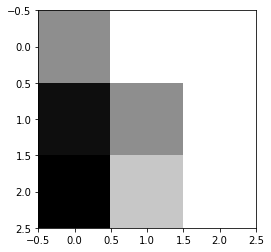

In [19]:
plt.imshow(band1[0], cmap = matplotlib.cm.binary, interpolation='nearest')

In [20]:
sat.columns

Index(['top_left1', 'top_left2', 'top_left3', 'top_left4', 'top_center1',
       'top_center2', 'top_center3', 'top_center4', 'top_right1', 'top_right2',
       'top_right3', 'top_right4', 'middle_left1', 'middle_left2',
       'middle_left3', 'middle_left4', 'middle_center1', 'middle_center2',
       'middle_center3', 'middle_center4', 'middle_right1', 'middle_right2',
       'middle_right3', 'middle_right4', 'bottom_left1', 'bottom_left2',
       'bottom_left3', 'bottom_left4', 'bottom_center1', 'bottom_center2',
       'bottom_center3', 'bottom_center4', 'bottom_right1', 'bottom_right2',
       'bottom_right3', 'bottom_right4', 'Class'],
      dtype='object')

In [21]:
sat_band1 = sat[['top_left1', 'top_center1', 'top_right1', 
                 'middle_left1', 'middle_center1', 'middle_right1',
                 'bottom_left1', 'bottom_center1', 'bottom_right1', 'Class']].astype('int')
sat_band2 = sat[['top_left2', 'top_center2', 'top_right2', 
                 'middle_left2', 'middle_center2', 'middle_right2', 
                 'bottom_left2', 'bottom_center2', 'bottom_right2', 'Class']].astype('int')
sat_band3 = sat[['top_left3', 'top_center3', 'top_right3', 
                 'middle_left3', 'middle_center3', 'middle_right3', 
                 'bottom_left3', 'bottom_center3', 'bottom_right3', 'Class']].astype('int')
sat_band4 = sat[['top_left4', 'top_center4', 'top_right4', 
                 'middle_left4', 'middle_center4', 'middle_right4', 
                 'bottom_left4', 'bottom_center4', 'bottom_right4', 'Class']].astype('int')

In [22]:
band_1 = sat[['middle_center1', 'Class']].astype('int')
band_01 = band_1[['middle_center1']].to_numpy()
band_01

array([[92],
       [84],
       [84],
       ...,
       [75],
       [75],
       [71]])

In [23]:
band1_5 = (sat_band1['Class'] == 5) # True for all 5s. False for others.
band1_5

0       False
1       False
2       False
3       False
4       False
        ...  
4430     True
4431     True
4432    False
4433    False
4434    False
Name: Class, Length: 4435, dtype: bool

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(band_01, band1_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
band_01[0]

array([92])

In [26]:
detect = []

for i in range(0,len(band_01)):
  pred = sgd_clf.predict([band_01[i]])
  detect.append(pred)

In [27]:
unique, counts = np.unique(detect, return_counts=True)
dict(zip(unique, counts))

{False: 4101, True: 334}

In [28]:
sat['Class'].value_counts()

1    1072
7    1038
3     961
2     479
5     470
4     415
Name: Class, dtype: int64

In [29]:
detect[0]

array([False])

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, band_01, band1_5, cv=3, scoring="accuracy")

array([0.70520622, 0.87077131, 0.86400541])

Between 70.52-86.40 % accuracy (ratio of correct predictions).

In [31]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [32]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, band_01, band1_5, cv=3, scoring="accuracy")

array([0.89790399, 0.86671177, 0.91745602])

Between 86.67-91.74 % accuracy (ratio of correct predictions).

In [33]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, band_01, band1_5, cv=3)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(band1_5, y_train_pred)

array([[3596,  369],
       [ 459,   11]])

## Precision and Recall

In [35]:
from sklearn.metrics import precision_score, recall_score
precision_score(band1_5, y_train_pred) # == 4344 / (4344 + 1307)

0.02894736842105263